In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading dataset
df = pd.read_csv('Bengaluru_House_Data.csv')

In [3]:
df.sample(5)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
1497,Built-up Area,Ready To Move,Ejipura,3 BHK,DSncele,1650,3.0,0.0,110.0
1285,Super built-up Area,Ready To Move,Kanakpura Road,3 BHK,SLourle,1542,2.0,3.0,85.0
4177,Plot Area,Ready To Move,Raja Rajeshwari Nagar,8 Bedroom,NaN,4800,8.0,NaN,225.0
11130,Super built-up Area,Ready To Move,KR Puram,2 BHK,Gasom B,1204,2.0,2.0,58.0
13285,Super built-up Area,Ready To Move,VHBCS Layout,2 BHK,OlarkLa,1353,2.0,2.0,110.0


In [4]:
df.shape

(13320, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [6]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [7]:
#percentage missing in cols
(df.isnull().sum() / df.shape[0]) * 100

area_type        0.000000
availability     0.000000
location         0.007508
size             0.120120
society         41.306306
total_sqft       0.000000
bath             0.548048
balcony          4.572072
price            0.000000
dtype: float64

In [8]:
#since society have 41% missing value so this feature will get droped
df.drop(columns=['society'],inplace=True)

In [9]:
#checking unique values in all columns
df.nunique()

area_type          4
availability      81
location        1305
size              31
total_sqft      2117
bath              19
balcony            4
price           1994
dtype: int64

In [10]:
for cols in df.columns:
    print((df[cols].value_counts()/df.shape[0])*100)

area_type
Super built-up  Area    65.990991
Built-up  Area          18.153153
Plot  Area              15.202703
Carpet  Area             0.653153
Name: count, dtype: float64
availability
Ready To Move    79.436937
18-Dec            2.304805
18-May            2.214715
18-Apr            2.034535
18-Aug            1.501502
                   ...    
15-Aug            0.007508
17-Jan            0.007508
16-Nov            0.007508
16-Jan            0.007508
14-Jul            0.007508
Name: count, Length: 81, dtype: float64
location
Whitefield                        4.054054
Sarjapur  Road                    2.995495
Electronic City                   2.267267
Kanakpura Road                    2.049550
Thanisandra                       1.756757
                                    ...   
Bapuji Layout                     0.007508
1st Stage Radha Krishna Layout    0.007508
BEML Layout 5th stage             0.007508
singapura paradise                0.007508
Abshot Layout                     0.0

<h1>Analysis of each column seperately:</h1>

<h2>Analysis of area_type column:</h2>

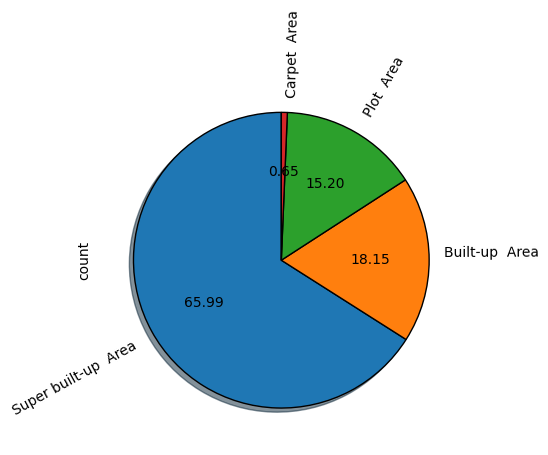

In [11]:
df['area_type'].value_counts().plot.pie(autopct='%.2f',shadow=True,startangle=90,wedgeprops={'edgecolor':'black'},rotatelabels=True)
plt.show()

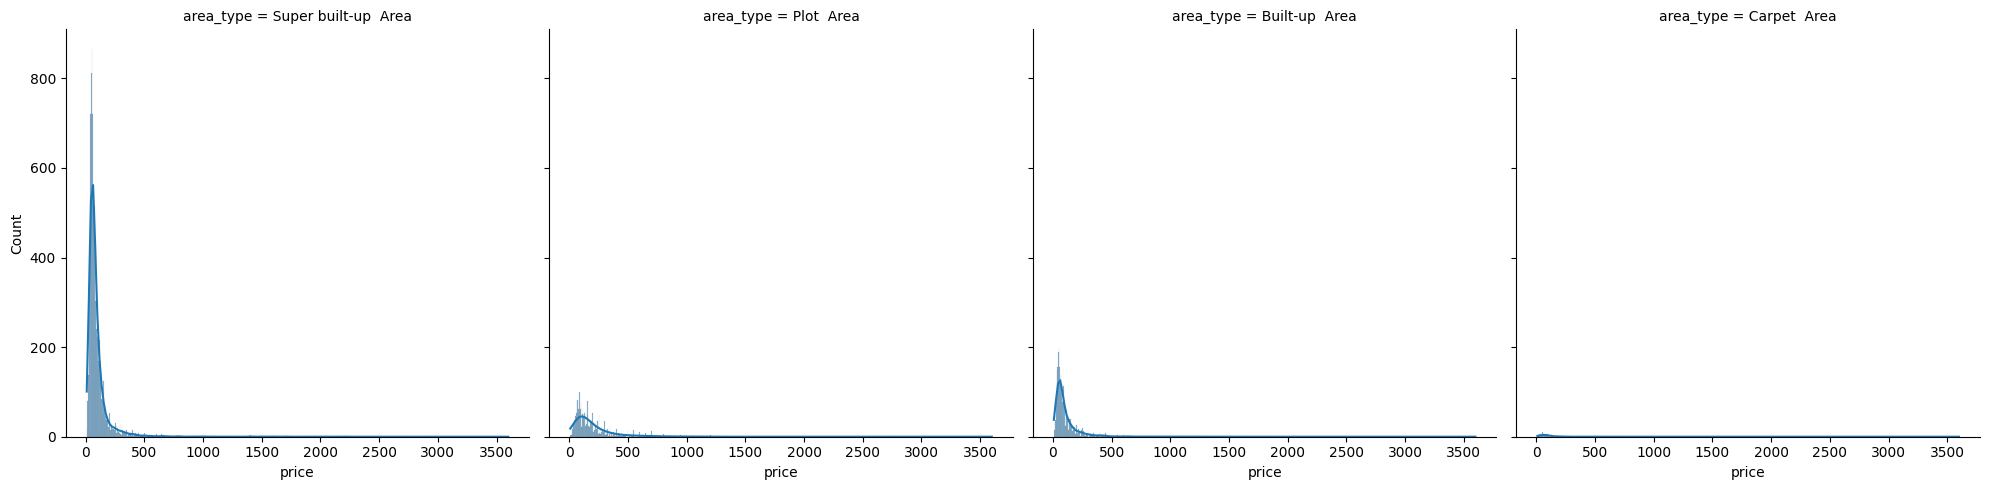

In [12]:
sns.displot(df, x="price", col="area_type", kde=True, col_wrap=4)
plt.show()

In [13]:
# area_type have 4 categories out of which one is 66% and also probablity density function of
# all four category is almost same so droping this feature
df.drop(columns=['area_type'],inplace=True)

<h2>Analysis of availability column:</h2>

In [14]:
(df['availability'].value_counts()/df.shape[0])*100

availability
Ready To Move    79.436937
18-Dec            2.304805
18-May            2.214715
18-Apr            2.034535
18-Aug            1.501502
                   ...    
15-Aug            0.007508
17-Jan            0.007508
16-Nov            0.007508
16-Jan            0.007508
14-Jul            0.007508
Name: count, Length: 81, dtype: float64

In [15]:
# availability have 81 categories but one value is around 80% so this feature is not usefull
df.drop(columns=['availability'],inplace=True)

In [16]:
df.sample(3)

,location,size,total_sqft,bath,balcony,price
699,Tindlu,3 Bedroom,1500,2.0,1.0,87.0
4050,Murugeshpalya,2 BHK,1185,2.0,1.0,85.0
11491,CV Raman Nagar,3 BHK,1400,2.0,2.0,78.0


<h2>Analysis of location column:</h2>

In [17]:
df['location'].value_counts()

location
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: count, Length: 1305, dtype: int64

In [18]:
df['location'].isna().sum()

1

In [19]:
#filling missing value with mode
df['location'] = df['location'].fillna('Whitefield')

In [20]:
df['location'].nunique()

1305

In [21]:
location_counts = df['location'].value_counts()

In [22]:
len(location_counts[location_counts<=10])

1064

In [23]:
len(location_counts[location_counts>10])

241

In [24]:
# There are 1064 locations with 10 or fewer occurrences.
# To reduce the number of unique categories, these locations will be grouped under a new category named "other".
df['location'] = df['location'].apply(lambda x:'other' if location_counts[x]<=10 else x)

In [25]:
df['location'].nunique()

242

now there are only 242 categories 

In [26]:
df.sample(3)

,location,size,total_sqft,bath,balcony,price
8978,Kudlu Gate,2 BHK,1464,3.0,3.0,56.0
11837,Varthur,2 BHK,1112,2.0,2.0,40.0
1828,Old Airport Road,4 BHK,2690,4.0,3.0,191.0


<h2>Analysis of size column:</h2>

In [27]:
# now let's work on size column
df['size'].isnull().sum()

16

In [28]:
df['size'].value_counts()

size
2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: count, dtype: int64

In [29]:
# filling missing value with 2 BHK
df['size'] = df['size'].fillna('2 BHK')

In [30]:
df['size'].value_counts()

size
2 BHK         5215
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: count, dtype: int64

The 'size' column contains two types of categories: 'Bedroom' and 'BHK'.<br>
To ensure consistency, this needs to be standardized.<br>
making a new column BHK 

In [31]:
df['BHK'] = df['size'].str.split(' ').str[0].astype(int)

In [32]:
df['BHK'].value_counts()

BHK
2     5544
3     4857
4     1417
1      656
5      356
6      221
7      100
8       89
9       54
10      14
11       4
27       1
19       1
16       1
43       1
14       1
12       1
13       1
18       1
Name: count, dtype: int64

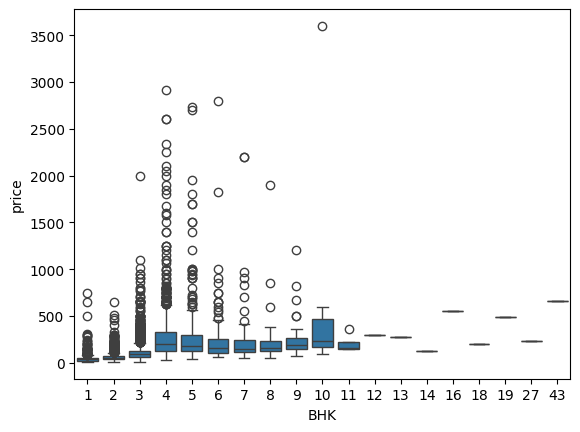

In [33]:
sns.boxplot(x=df['BHK'],y=df['price'])
plt.show()

there are many outliers that need to be fixed,will fixed later

In [34]:
# removinf size column
df.drop(columns=['size'],inplace=True)

In [35]:
df.sample(5)

,location,total_sqft,bath,balcony,price,BHK
11480,other,3150,4.0,3.0,180.00,4
9218,Electronics City Phase 1,1800,3.0,2.0,93.00,3
12432,Sonnenahalli,605,1.0,1.0,30.24,1
10281,other,1385,3.0,3.0,90.00,3
3782,Subramanyapura,1330,3.0,2.0,72.00,3


<h2> Analysis of total_sqft column:</h2>

In [36]:
df['total_sqft'].nunique()

2117

In [37]:
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [38]:
# there are few values in ranges 
def convert_ranges_to_sqft(x):
    temp = x.split('-')
    if(len(temp)==2):
        return (float(temp[0])+float(temp[1]))/2
    try:
        return float(x)
    except:
        return None

In [39]:
df['total_sqft'] = df['total_sqft'].apply(convert_ranges_to_sqft)

In [40]:
df.sample(3)

,location,total_sqft,bath,balcony,price,BHK
5713,Kothanur,627.0,1.0,1.0,30.0,1
10501,Nagarbhavi,1200.0,4.0,3.0,240.0,4
9680,Kaikondrahalli,991.0,2.0,0.0,64.0,2


<h4>creating a new columns price per sqft because it's a very important feature in real state:</h4>

In [41]:
df['price_per_sqft'] = df['price']*100000/df['total_sqft']

In [42]:
df['price_per_sqft']

0         3699.810606
1         4615.384615
2         4305.555556
3         6245.890861
4         4250.000000
             ...     
13315     6689.834926
13316    11111.111111
13317     5258.545136
13318    10407.336319
13319     3090.909091
Name: price_per_sqft, Length: 13320, dtype: float64

In [43]:
df.describe()

,total_sqft,bath,balcony,price,BHK,price_per_sqft
count,13274.000000,13247.000000,12711.000000,13320.000000,13320.000000,1.327400e+04
mean,1559.626694,2.692610,1.584376,112.565627,2.802778,7.907501e+03
std,1238.405258,1.341458,0.817263,148.971674,1.294496,1.064296e+05
min,1.000000,1.000000,0.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,1.000000,50.000000,2.000000,4.266865e+03
50%,1276.000000,2.000000,2.000000,72.000000,3.000000,5.434306e+03
75%,1680.000000,3.000000,2.000000,120.000000,3.000000,7.311746e+03
max,52272.000000,40.000000,3.000000,3600.000000,43.000000,1.200000e+07


In [44]:
df.isnull().sum()

location            0
total_sqft         46
bath               73
balcony           609
price               0
BHK                 0
price_per_sqft     46
dtype: int64

<h2>Analysis of bath column:</h2>

In [45]:
df['bath'].nunique()

19

In [46]:
df['bath'].value_counts()

bath
2.0     6908
3.0     3286
4.0     1226
1.0      788
5.0      524
6.0      273
7.0      102
8.0       64
9.0       43
10.0      13
12.0       7
13.0       3
11.0       3
16.0       2
27.0       1
40.0       1
15.0       1
14.0       1
18.0       1
Name: count, dtype: int64

In [47]:
df['bath'].unique()

array([ 2.,  5.,  3.,  4.,  6.,  1.,  9., nan,  8.,  7., 11., 10., 14.,
       27., 12., 16., 40., 15., 13., 18.])

In [48]:
df['bath'].isnull().sum()

73

In [49]:
#filling missing value with median
df['bath'] = df['bath'].fillna(df['bath'].median())

<Axes: xlabel='bath', ylabel='count'>

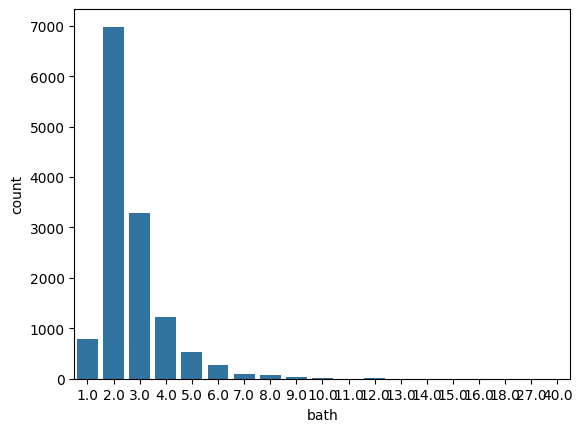

In [50]:
sns.countplot(x=df['bath'])

This column contains outliers, which will be handled later.

In [51]:
df.sample(3)

,location,total_sqft,bath,balcony,price,BHK,price_per_sqft
3568,other,3259.0,3.0,0.0,270.0,3,8284.749923
10280,Kumaraswami Layout,510.0,4.0,1.0,70.0,6,13725.490196
5371,Whitefield,1255.0,2.0,3.0,77.0,2,6135.458167


<h2>Analysis of balcony column:</h2>

In [52]:
df['balcony'].nunique()

4

In [53]:
df['balcony'].value_counts()

balcony
2.0    5113
1.0    4897
3.0    1672
0.0    1029
Name: count, dtype: int64

In [54]:
df['balcony'].isnull().sum()

609

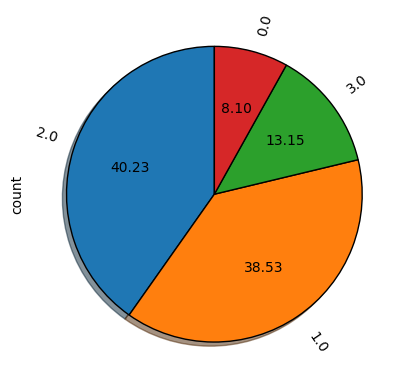

In [55]:
df['balcony'].value_counts().plot.pie(autopct='%.2f',shadow=True,startangle=90,wedgeprops={'edgecolor':'black'},rotatelabels=True)
plt.show()

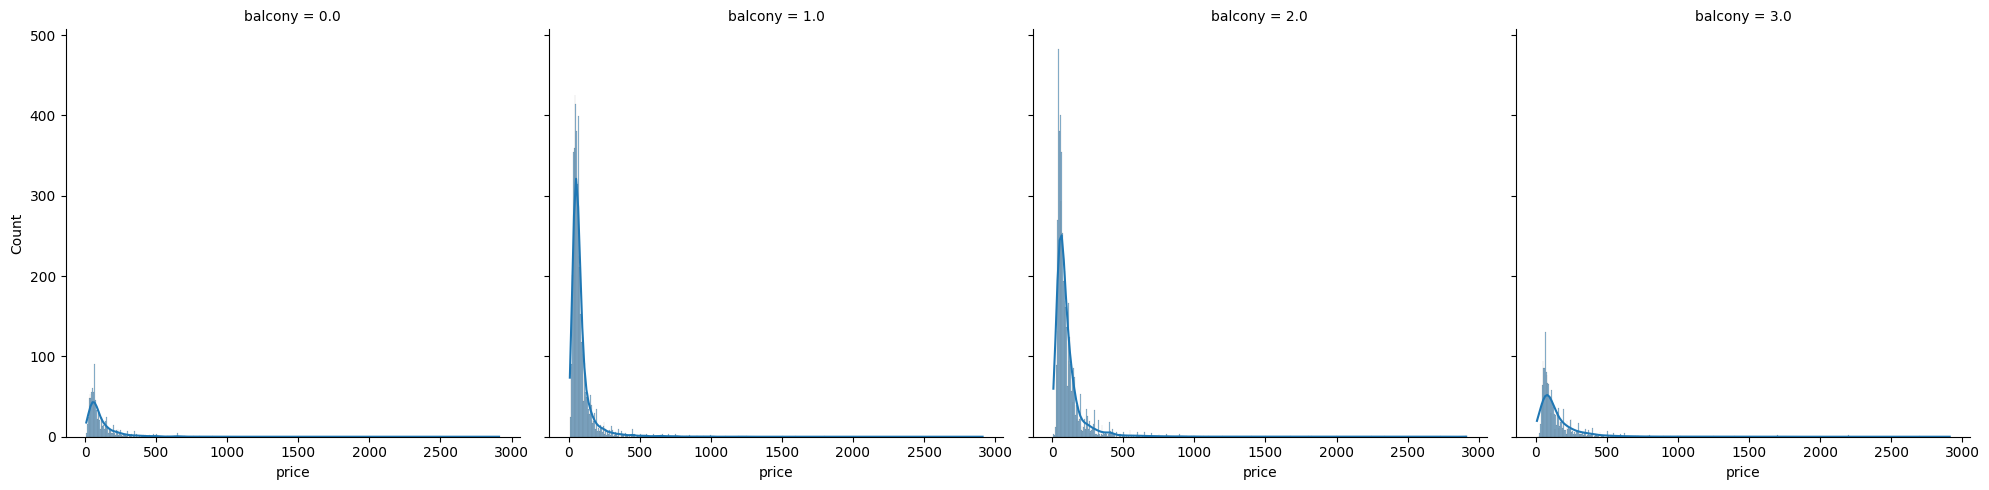

In [56]:
sns.displot(df, x="price", col="balcony", kde=True, col_wrap=4)
plt.show()

since there are only four categories and pdf is almost similar in all so this feature doesn't impact price that much so it will get dropped

In [57]:
df.drop(columns=['balcony'],inplace=True)

In [58]:
df.sample(3)

,location,total_sqft,bath,price,BHK,price_per_sqft
8445,Kanakpura Road,1703.0,3.0,130.0,3,7633.587786
6789,Hegde Nagar,1965.0,4.0,132.0,3,6717.557252
2473,Kaggadasapura,1625.0,3.0,55.0,3,3384.615385


<h4># The analysis of all columns is complete. Next, the focus will be on detecting and removing outliers.
</h4>

<h1>Outlier's detection and removal</h1>

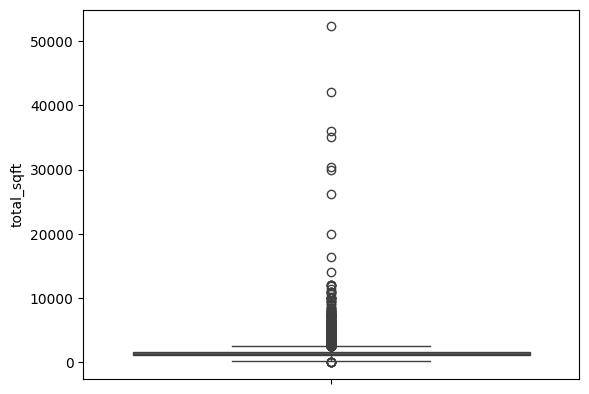

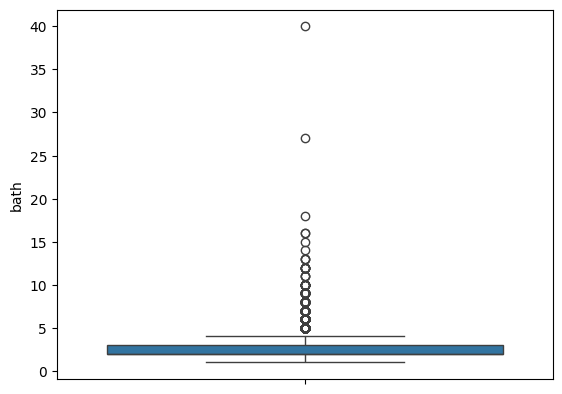

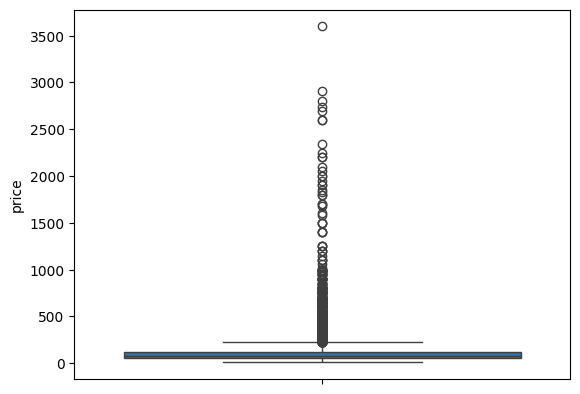

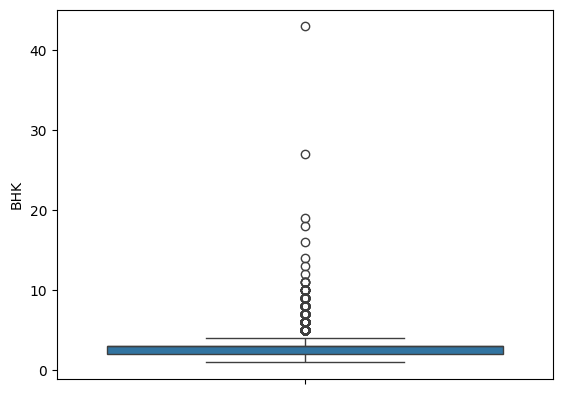

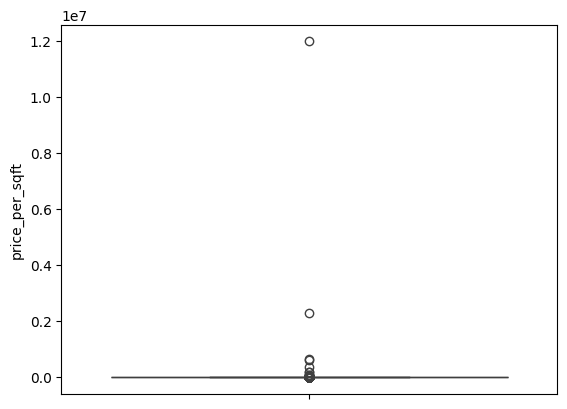

In [59]:
#Checking outlier for numerical columns
def boxplot(col):
    sns.boxplot(df[col])
    plt.show()
for i in list(df.select_dtypes(exclude = ['object']).columns):
    boxplot(i)

In [60]:
df.sample(3)

,location,total_sqft,bath,price,BHK,price_per_sqft
1106,Haralur Road,1225.0,2.0,67.38,2,5500.408163
7850,Tumkur Road,4800.0,5.0,150.00,5,3125.000000
9860,other,2000.0,6.0,300.00,6,15000.000000


In [61]:
df.describe()

,total_sqft,bath,price,BHK,price_per_sqft
count,13274.000000,13320.000000,13320.000000,13320.000000,1.327400e+04
mean,1559.626694,2.688814,112.565627,2.802778,7.907501e+03
std,1238.405258,1.338754,148.971674,1.294496,1.064296e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.266865e+03
50%,1276.000000,2.000000,72.000000,3.000000,5.434306e+03
75%,1680.000000,3.000000,120.000000,3.000000,7.311746e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


<h2>outlier's of total_sqft column :</h2>

let's see area per BHK:

In [62]:
(df['total_sqft']/df['BHK']).describe()

count    13274.000000
mean       575.074878
std        388.205175
min          0.250000
25%        473.333333
50%        552.500000
75%        625.000000
max      26136.000000
dtype: float64

In [63]:
# For 1BHK area should be >= 300 so removing rows in area per BHK is less than 300
df = df[(df['total_sqft']/df['BHK']) >= 300]

In [64]:
df.shape

(12530, 6)

In [65]:
df.describe()

,total_sqft,bath,price,BHK,price_per_sqft
count,12530.000000,12530.000000,12530.000000,12530.000000,12530.000000
mean,1594.564544,2.559537,111.382401,2.650838,6303.979357
std,1261.271296,1.077938,152.077329,0.976678,4162.237981
min,300.000000,1.000000,8.440000,1.000000,267.829813
25%,1116.000000,2.000000,49.000000,2.000000,4210.526316
50%,1300.000000,2.000000,70.000000,3.000000,5294.117647
75%,1700.000000,3.000000,115.000000,3.000000,6916.666667
max,52272.000000,16.000000,3600.000000,16.000000,176470.588235


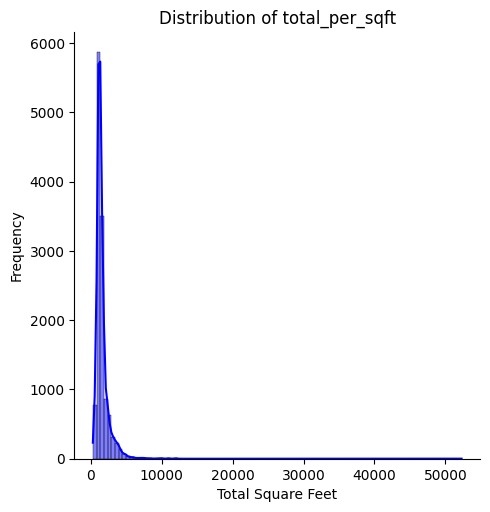

In [66]:
sns.displot(data=df,
           x="total_sqft",
           kind='hist',
           kde=True,
           bins=100,
           color='blue',
           edgecolor='black')

plt.title('Distribution of total_per_sqft')
plt.xlabel('Total Square Feet')
plt.ylabel('Frequency')
plt.show()

In [67]:
df.sample(3)

,location,total_sqft,bath,price,BHK,price_per_sqft
9554,Marathahalli,3951.0,4.0,230.00,4,5821.311060
6884,Banashankari Stage III,1480.0,3.0,75.48,3,5100.000000
1021,other,1175.0,2.0,48.27,2,4108.085106


<h2>Outlier's of price_per_sqft:</h2>

In [68]:
df['price_per_sqft'].describe()

count     12530.000000
mean       6303.979357
std        4162.237981
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [69]:
# price_per_sqft location wise
df.groupby('location')['price_per_sqft'].describe()

,count,mean,std,min,25%,50%,75%,max
location,,,,,,,,
Devarachikkanahalli,14.0,4969.906245,2594.870914,3185.840708,3649.081736,4305.148257,4676.936243,13333.333333
1st Block Jayanagar,10.0,12359.253758,3931.939592,6000.000000,11100.460123,12258.569501,15018.022329,18750.000000
1st Phase JP Nagar,23.0,9726.405918,4802.127570,5274.725275,7170.133907,8425.613866,9901.259524,25000.000000
2nd Phase Judicial Layout,11.0,4048.701183,674.730658,3500.000000,3500.000000,3500.000000,4739.316239,5000.000000
2nd Stage Nagarbhavi,9.0,14381.275720,5272.435848,5666.666667,14666.666667,15033.333333,18750.000000,20416.666667
...,...,...,...,...,...,...,...,...
Yelahanka,208.0,5177.606819,1761.479589,371.428571,4290.940767,5012.513762,5859.524889,19875.776398
Yelahanka New Town,38.0,5860.659870,3889.233175,1875.000000,3776.785714,5040.025016,5413.853463,22475.000000
Yelenahalli,13.0,4012.550871,533.259531,3125.000000,3800.000000,3835.625000,4121.212121,5176.876618


For each location group, price_per_sqft will be kept within the range [mean - standard deviation, mean + standard deviation].

In [70]:
#function to kept price_per_sqft in range
def remove_price_per_sqft_outliers(df):
    temp_df = pd.DataFrame()
    for location,sub_df in df.groupby('location'):
        mean = sub_df['price_per_sqft'].mean()
        std_dev = sub_df['price_per_sqft'].std()
        
        filtered_df = sub_df[(sub_df['price_per_sqft'] >= mean-std_dev) & (sub_df['price_per_sqft'] <= mean+std_dev)]
        temp_df = pd.concat([temp_df,filtered_df],ignore_index=True)
    return temp_df
df = remove_price_per_sqft_outliers(df)

In [71]:
df['price_per_sqft'].describe()

count    10353.000000
mean      5660.848288
std       2270.910791
min       1250.000000
25%       4239.631336
50%       5175.600739
75%       6432.748538
max      24509.803922
Name: price_per_sqft, dtype: float64

In [72]:
df.sample(2)

,location,total_sqft,bath,price,BHK,price_per_sqft
4482,Kengeri Satellite Town,1050.0,2.0,43.00,2,4095.238095
2002,Electronic City,1152.0,2.0,65.75,2,5707.465278


## Distribution of price_per_sqft after removing the outlier

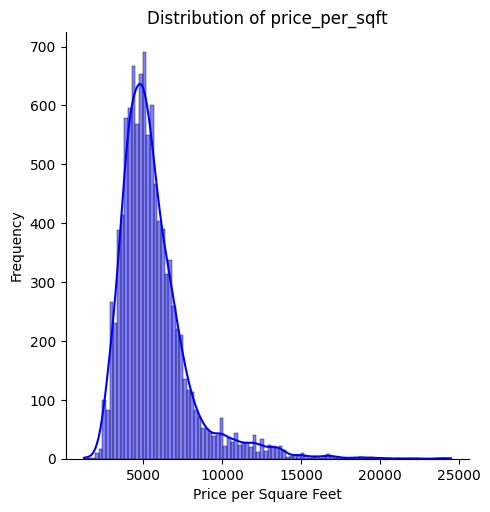

In [73]:
sns.displot(data=df,
           x="price_per_sqft",
           kind='hist',
           kde=True,
           bins=100,
           color='blue',
           edgecolor='black')

plt.title('Distribution of price_per_sqft')
plt.xlabel('Price per Square Feet')
plt.ylabel('Frequency')
plt.show()

<h2>Outlier's of BHK column:</h2>

<Axes: xlabel='BHK', ylabel='count'>

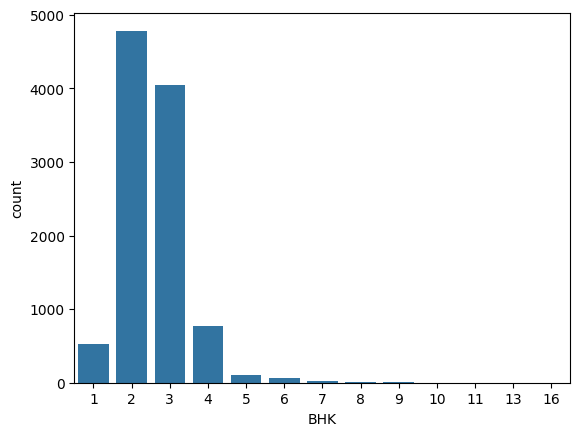

In [74]:
sns.countplot(x=df['BHK'])

<Axes: xlabel='BHK'>

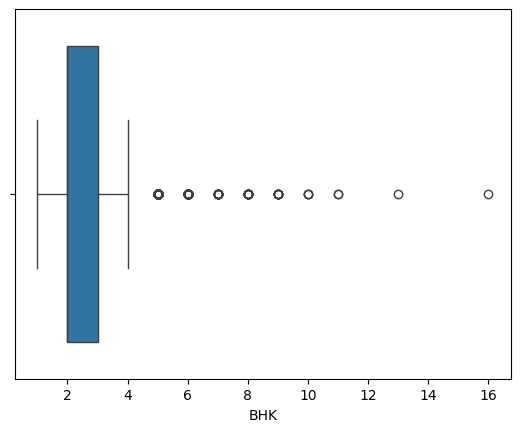

In [75]:
sns.boxplot(x=df['BHK'])

Houses with more than 6BHK are uncommon, so they will be removed from the dataset.

In [76]:
## Function for Trimming in order to remove outlier
def remove_outliers_iqr(df, column, multiplier=1.5):
    # Calculate Q1, Q3, and IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Calculate bounds
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR
    
    # Filter dataframe
    df_cleaned = df[(df[column] > lower_bound) & (df[column] < upper_bound)]
    
    # Optional: Print removed rows count
    removed_rows = len(df) - len(df_cleaned)
    print(f"Removed {removed_rows} outliers from {column}")
    
    return df_cleaned

In [77]:
df = remove_outliers_iqr(df, 'BHK')

Removed 224 outliers from BHK


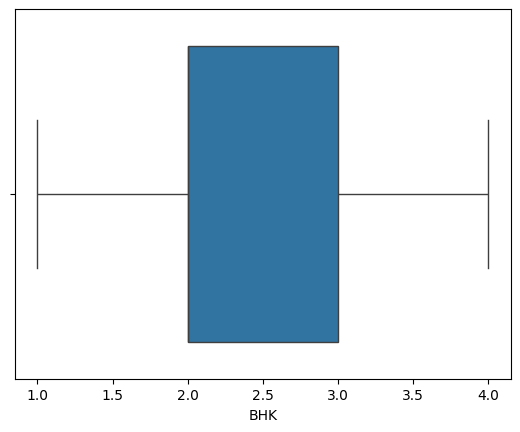

In [78]:
sns.boxplot(x=df['BHK'])
plt.show()

In [79]:
df.sample(2)

,location,total_sqft,bath,price,BHK,price_per_sqft
6838,Thigalarapalya,3122.0,6.0,235.0,4,7527.226137
9639,other,1155.0,2.0,65.0,2,5627.705628


<h2>Outlier's of bath column:</h2>

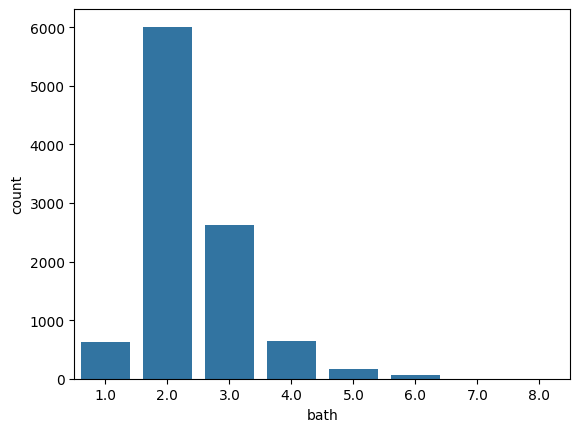

In [80]:
sns.countplot(x=df['bath'])
plt.show()

In [81]:
# Houses with more than 6 bathrooms are uncommon, so they will be removed from the dataset.
df = df[df['bath'] <= 6].copy()

In [82]:
# Ensuring that the number of bathrooms does not exceed BHK + 2
df = df[df['bath'] <= df['BHK'] + 2].copy()

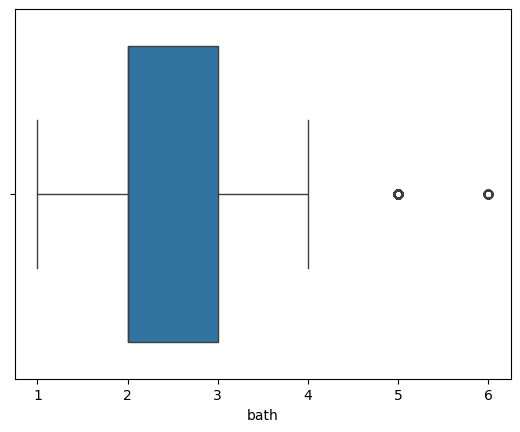

In [83]:
sns.boxplot(x=df['bath'])
plt.show()

In [84]:
df.describe()

,total_sqft,bath,price,BHK,price_per_sqft
count,10126.000000,10126.000000,10126.000000,10126.000000,10126.000000
mean,1463.910794,2.398380,88.049899,2.498815,5629.610723
std,751.396897,0.810848,77.945026,0.711631,2207.828168
min,300.000000,1.000000,10.000000,1.000000,1250.000000
25%,1101.000000,2.000000,48.330000,2.000000,4237.918216
50%,1275.000000,2.000000,66.000000,2.000000,5169.203193
75%,1616.000000,3.000000,98.000000,3.000000,6400.000000
max,30000.000000,6.000000,2100.000000,4.000000,24166.666667


In [85]:
df.sample(2)

,location,total_sqft,bath,price,BHK,price_per_sqft
7195,Vijayanagar,1200.0,2.0,75.0,3,6250.000000
8878,other,1645.0,3.0,87.5,3,5319.148936


In [86]:
# Dropping the price_per_sqft column as it will no longer be used in further analysis.
df.drop(columns=['price_per_sqft'], inplace=True)

In [87]:
df.sample(3)

,location,total_sqft,bath,price,BHK
7793,Yelahanka,1274.0,2.0,48.42,2
6465,Seegehalli,920.0,2.0,27.00,2
2953,Hebbal Kempapura,3522.0,3.0,380.00,3


In [88]:
num_featrures = df.select_dtypes(include='number')
corr = num_featrures.corr()
corr

,total_sqft,bath,price,BHK
total_sqft,1.000000,0.672795,0.828892,0.645604
bath,0.672795,1.000000,0.606116,0.801349
price,0.828892,0.606116,1.000000,0.536784
BHK,0.645604,0.801349,0.536784,1.000000


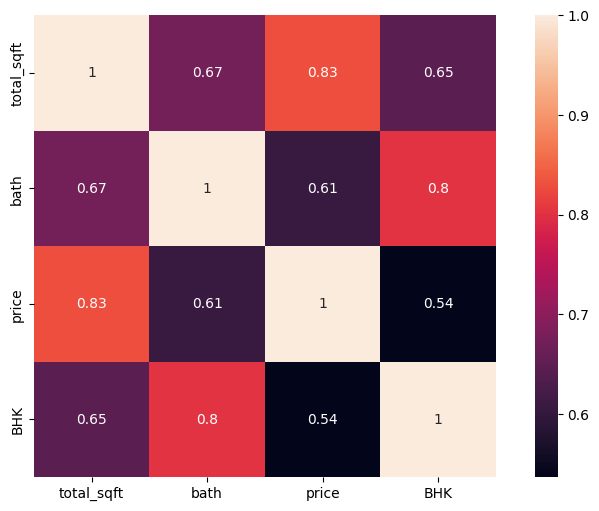

In [89]:
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, square=True)
plt.show()

In [90]:
## Save the cleaned data to a csv file
df.to_csv("Cleaned_data.csv")

In [91]:
## Split the data features and target variable
X = df.drop(columns=['price'])
y = df['price']
X.shape, y.shape

((10126, 4), (10126,))

<h3>Now the dataset is cleaned</h3>

<h1>Model Building:</h1>

In [92]:
#importing libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [93]:
X_train,X_test,y_train,y_test = train_test_split(X, y,test_size=0.2,random_state=42)

In [94]:
print(X_train.shape)
print(X_test.shape)

(8100, 4)
(2026, 4)


In [95]:
# transformer for OneHotEncoding
one_hot_transformer = ColumnTransformer([
    ('one_hot_encoder',OneHotEncoder(sparse_output=False,dtype=int,handle_unknown='ignore'),['location'])
],remainder='passthrough')

### Normalization

In [96]:
## Scaling the data
scaler = StandardScaler()

In [97]:
## Function to evaluate the model
def evaluate_model(y_pred):
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    print(f"R2 score: {r2:.4f}")
    print(f"mse score: {mse:.4f}")
    print(f"RMSE score: {rmse:.4f}")

## Linear Regression

In [98]:
lr = LinearRegression()

In [99]:
pipe_lr = make_pipeline(one_hot_transformer,scaler,lr)

In [100]:
pipe_lr.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one_hot_encoder',
                                                  OneHotEncoder(dtype=<class 'int'>,
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [101]:
y_pred_lr = pipe_lr.predict(X_test)

In [102]:
evaluate_model(y_pred_lr)

R2 score: 0.8813
mse score: 844.3408
RMSE score: 29.0575


## Lasso Model

In [103]:
lasso = Lasso()

In [104]:
pipe_lasso = make_pipeline(one_hot_transformer,scaler,lasso)

In [105]:
pipe_lasso.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one_hot_encoder',
                                                  OneHotEncoder(dtype=<class 'int'>,
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()), ('lasso', Lasso())])

In [106]:
y_pred_lasso = pipe_lasso.predict(X_test)
evaluate_model(y_pred_lasso)

R2 score: 0.8723
mse score: 908.8982
RMSE score: 30.1479


## Ridge Model

In [107]:
ridge = Ridge()
pipe_ridge = make_pipeline(one_hot_transformer,scaler,ridge)
pipe_ridge.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one_hot_encoder',
                                                  OneHotEncoder(dtype=<class 'int'>,
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()), ('ridge', Ridge())])

In [108]:
y_pred_ridge = pipe_ridge.predict(X_test)
evaluate_model(y_pred_ridge)

R2 score: 0.8814
mse score: 844.0090
RMSE score: 29.0518


## XGBoost Regressor Model

In [109]:
xgb=XGBRegressor()
pipe_xgb=make_pipeline(one_hot_transformer,scaler,xgb)
pipe_xgb.fit(X_train,y_train)
y_pred_xgb=pipe_xgb.predict(X_test)

In [110]:
evaluate_model(y_pred_xgb)

R2 score: 0.7747
mse score: 1603.2534
RMSE score: 40.0406


## Random Forest Regressor

In [111]:
rfc=RandomForestRegressor()
pipe_rf=make_pipeline(one_hot_transformer,scaler,rfc)
pipe_rf.fit(X_train,y_train)
y_pred_rf=pipe_rf.predict(X_test)

In [112]:
evaluate_model(y_pred_rf)

R2 score: 0.7414
mse score: 1840.2197
RMSE score: 42.8978


## Decision Tree Regressor Model

In [113]:
dt=DecisionTreeRegressor()
pipe_dt=make_pipeline(one_hot_transformer,scaler,dt)
pipe_dt.fit(X_train,y_train)
y_pred_d=pipe_dt.predict(X_test)

In [114]:
evaluate_model(y_pred_d)

R2 score: 0.7091
mse score: 2070.0523
RMSE score: 45.4978


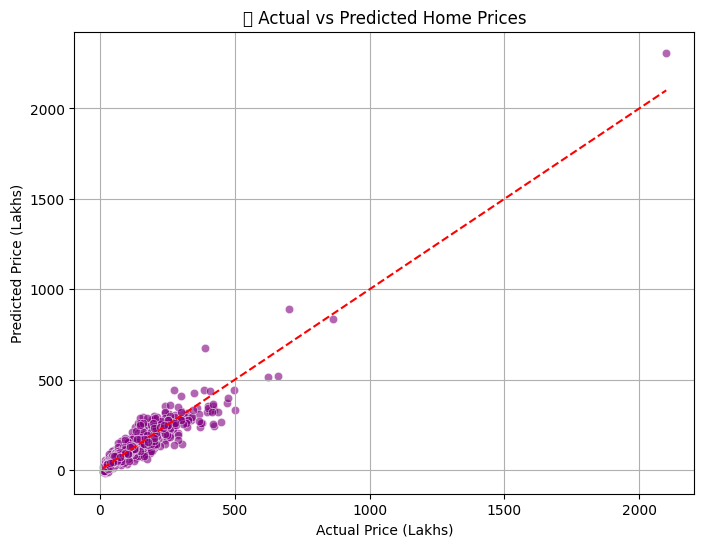

In [115]:
# Scatter plot of Actual vs Predicted
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred_ridge, alpha=0.6, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')  # Diagonal line
plt.xlabel('Actual Price (Lakhs)')
plt.ylabel('Predicted Price (Lakhs)')
plt.title('🔍 Actual vs Predicted Home Prices')
plt.grid(True)
plt.show()

## Lets do the hyperparamter tunning on Ridge model

In [116]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
import numpy as np

# 1. Create pipeline with parameter names
pipe_ridge = make_pipeline(
    one_hot_transformer,
    scaler,
    ridge
)

# 2. Define parameter grid 
param_grid = {
    'ridge__alpha': np.logspace(-3, 3, 20),  # Different alpha values
    'ridge__fit_intercept': [True, False],
    'ridge__solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sag', 'saga']
}

# 3. Create and fit GridSearchCV
grid_search = GridSearchCV(
    estimator=pipe_ridge,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

# 4. Fit the model
grid_search.fit(X_train, y_train)

# 5. Print results
print("Best parameters:", grid_search.best_params_)
print("Best RMSE score:", np.sqrt(-grid_search.best_score_))

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
Best parameters: {'ridge__alpha': 112.88378916846884, 'ridge__fit_intercept': True, 'ridge__solver': 'svd'}
Best RMSE score: 32.89632440296821


In [117]:
best_model = grid_search.best_estimator_

In [118]:
y_pred_gcv = best_model.predict(X_test)
evaluate_model(y_pred_gcv)

R2 score: 0.8842
mse score: 823.8369
RMSE score: 28.7026


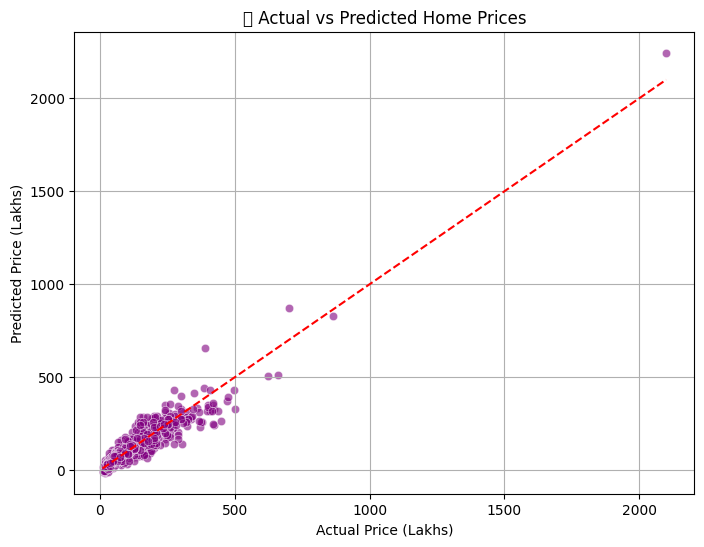

In [119]:
# Scatter plot of Actual vs Predicted
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred_gcv, alpha=0.6, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')  # Diagonal line
plt.xlabel('Actual Price (Lakhs)')
plt.ylabel('Predicted Price (Lakhs)')
plt.title('🔍 Actual vs Predicted Home Prices')
plt.grid(True)
plt.show()

## Prediction system

In [ ]:
def predict_house_price(model_pipeline, location, total_sqft, bath, balcony, BHK ):

    # Create a dataframe including location, BHK, price per sqft
    input_data = pd.DataFrame({
        'location': [location],           
        'total_sqft': [total_sqft],
        'bath': [bath],                 
        'balcony': [balcony],          
        'BHK': [BHK]    
    })

    ## Predict the price using the model pipeline
    return prediction[0]

In [121]:
predicted_price = predict_house_price(
    model_pipeline = best_model,
    location = 'Whitefield',
    total_sqft = 2000,
    bath = 2,
    balcony = 2,
    BHK = 4
)

print(f"Predicted Price of House: {predicted_price:.2f} lakhs")

Predicted Price of House: 107.21 lakhs


## Save the model

In [122]:
import pickle
pickle.dump(best_model, open("model.pkl",'wb'))
pickle.dump(scaler, open("scaler.pkl",'wb'))